In [2]:
#4a

import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
import math as m
import numpy.linalg as la
import scipy.linalg as sla
import csv

#Boeing Insitu ScanEagle Numbers (ON EARTH)
g = 9.81 #m/s^2
w1 = (18+14)/2 #avg empty structure weight in kg
w0 = 22 #kg (max takeoff weight)
Vmax = 41.2 #m/s max horisontal speed
Vcruise = (30 + 25)/2 #avg cruise speed in m/s
b = 3.11 #m (wingspan)
c = 3.11/13 #m (chord length using pixel counting)
Ceiling = 5944 #m
ServiceC = 4572 #m
Sref = b*c

#Boeing Insitu ScanEagle Numbers (ON TITAN)
gt = 1.352 #m/s^2 (t = Titan)
w1t = (w1)*gt #avg empty structure weight in kg
w0t = (w0)*gt #max takeoff weight in kg



4

In [4]:
import math
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import csv

#read csv
temp = []
altitudes = []
with open("TitanTempAlt.csv",'r') as csvfile:
    plots = csv.reader(csvfile, dialect='excel', delimiter=',')
    for row in plots:
        try:
            altitudes.append(float(row[0]))
            temp.append(float(row[1]))
        except:
            continue
            

#helper function that linearly interpolates a value at a given altitude between two altitudes
def linear_interpolator(para1, para2, alt1, alt2, alt):
    alt_ratio = (alt - alt1) / (alt2 - alt1)
    return ((para2 - para1) * alt_ratio) + para1

def atms_conditions(alt):
    #get alt in km to work with csv data which is in km
    alt = alt/1000
    if alt > altitudes[-1] or alt <= 0:
        print("sorry this altitude is not in range of our function")
        return
    
    P0 = 146700 #Pa
    R  = 296.9  #J/kg * K
    rho0 = P0 / (temp[0] * R)
    g = 1.352 #m/s^2; just googled value for titan
    #exponential relation for density
    #print(alt)
    R_titan = 2575 #km
    P1 = P0 * math.exp(-alt/(R_titan))
    #print(rho0)
    iterator = 0 #describes state state of while loop (ie what altitude and temp to be at)
    next_temp = temp[0]
    #lists akin to vectors, allow for dynamic storage of values
    while altitudes[iterator] < alt:
        #get the temp and altitude of the next state of function
        next_temp = temp[iterator + 1]
        next_altitude = altitudes[iterator + 1]
        iterator += 1
    
    T_ceil = temp[iterator]
    T_floor = temp[iterator - 1]
    alt_ceil = altitudes[iterator]
    alt_floor = altitudes[iterator - 1]
    T1 = linear_interpolator(T_floor, T_ceil, alt_floor, alt_ceil, alt)
    #print(T_floor, T_ceil, T1)
    
    rho1 = P1 / (R * T1)
    
    return alt*1000, P1, T1, rho1


print(atms_conditions(5000))

(5000.0, 146415.42200979285, 83.66322009, 5.894433195456286)


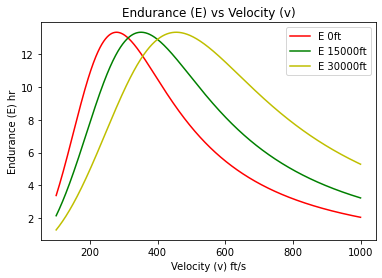

In [3]:
def CD(cl):
    return cd0+((cl**2)/(m.pi*e*AR))

#input rho in m, convert to ft

def p_r(rho,v): #power required
    cl = w0/ (.5*rho*(v**2)*sref)
    Tr = .5*(rho)*(v**2)*sref*CD(cl)
    Pr = Tr*v
    return Pr;

def p_a(rho,v): #power availible
    Ta = ((rho)/(0.002377))*Trmax
    Pa = Ta*v
    return Pa;

#rho values:
#at 0ft  rho = 2.3769e-3
#at 15,000ft rho = 1.4962e-3
#at 30,000ft rho = 8.90683e-4

v = np.linspace(100, 1000, 1000)
plt.plot(v, p_r(2.3769e-3,v), 'r', label = 'Pr 0ft')
plt.plot(v, p_r(1.4962e-3,v), 'g', label = 'Pr 15000ft')
plt.plot(v, p_r(8.90683e-4,v), 'y', label = 'Pr 30000ft')

plt.plot(v, p_a(2.3769e-3,v),'c', label = 'Pr 0ft')
plt.plot(v, p_a(1.4962e-3,v), 'm', label = 'Pr 15000ft')
plt.plot(v, p_a(8.90683e-4,v), 'k', label = 'Pr 30000ft')

plt.ylabel('Power (P) ft*lb/s')
plt.xlabel('Velocity (v) ft/s')
plt.title('Power (P) vs Velocity (v)')
plt.legend()
plt.show()


#4b

def rc(rho,v):
    PA = p_a(rho,v)
    PR = p_r(rho,v)
    return (PA-PR)/w0

rc1 = rc(2.3769e-3,v)
rc2 = rc(1.4962e-3,v)
rc3 = rc(8.90683e-4,v)

plt.plot(v,rc1,'r', label = 'r/c 0ft')
plt.plot(v,rc2, 'g', label = 'r/c 15000ft')
plt.plot(v,rc3, 'b', label = 'r/c 30000ft')
plt.ylabel('Rate of climb (r/c)')
plt.xlabel('Velocity (v) ft/s')
plt.title('Rate of climb (r/c) vs Velocity (v)')
plt.legend()
plt.show()

max_y1 = max(rc1)  # Find the maximum y value
print(max_y1)
max_y2 = max(rc2)  # Find the maximum y value
print(max_y2)
max_y3= max(rc3)  # Find the maximum y value
print(max_y3)

#4c

altitude = [0,15000,30000]
rcmax = [max_y1,max_y2,max_y3]
z = np.polyfit(rcmax,altitude,deg = 1) #polynomial that best fits #1 is degree of polynomial
m = z[0]
b = z[1]

absceil = b
print(absceil)
servceil = (m*(100/60))+b
print(servceil)




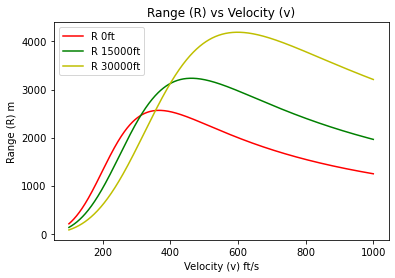

In [4]:
#Problem 5
wf = 7500 #lb
ct = 0.6 #lb/lb*hr
w1 = w0-wf

def E(rho,v):
    cl = w0/ (.5*rho*(v**2)*sref)
    return (1/ct)*(cl/CD(cl))*np.log(w0/w1)

v = np.linspace(100, 1000, 1000)
plt.plot(v, E(2.3769e-3,v), 'r', label = 'E 0ft')
plt.plot(v, E(1.4962e-3,v), 'g', label = 'E 15000ft')
plt.plot(v, E(8.90683e-4,v), 'y', label = 'E 30000ft')
plt.ylabel('Endurance (E) hr')
plt.xlabel('Velocity (v) ft/s')
plt.title('Endurance (E) vs Velocity (v)')
plt.legend()
plt.show()


In [1]:
#5b
ct = 0.6/3600 #convert to s
def jetR(rho,v):
    cl = w0/ (.5*rho*(v**2)*sref)
    return (2*m.sqrt(2/(rho*sref))*(1/ct)*((cl**0.5)/CD(cl))*(m.sqrt(w0) - m.sqrt(w1)))/5280

v = np.linspace(100, 1000, 1000)
plt.plot(v, jetR(2.3769e-3,v), 'r', label = 'R 0ft')
plt.plot(v, jetR(1.4962e-3,v), 'g', label = 'R 15000ft')
plt.plot(v, jetR(8.90683e-4,v), 'y', label = 'R 30000ft')
plt.ylabel('Range (R) m')
plt.xlabel('Velocity (v) ft/s')
plt.title('Range (R) vs Velocity (v)')
plt.legend()
plt.show()


14

In [ ]:
42361.38045786661
41830.05423269447